<a href="https://colab.research.google.com/github/cmedanielle/EspecializacaoDataScience/blob/master/aula_sabado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DISCIPLINA - ESTATÍSTICA (SÁBADO)**

## **Antes de mais nada... algumas informações importantes sobre a montagem do ambiente**

Importando as libs necessárias

In [1]:
import pandas as pd, numpy as np, scipy as sp, seaborn as sb

In [2]:
import statsmodels.api as sm

Se você tiver algum problema com a dependência do statsmodel:

In [0]:
!pip install scipy==1.2 --upgrade

Lendos nossos dados

In [21]:
dados = pd.read_csv('dados.csv')

In [0]:
dados.head()

## 1. Introdução à Regressão Linear

*Não há outro lugar onde o nexo entre a estatística e a ciência de dados seja mais forte do que no tocante à previsão - especificamente, a previsão de uma variável resultante (alvo) baseada nos valores de outras variáveis preditoras*

In [3]:
dados_alunos = {
	'Nota' :      [20,34,30,15,35,81,47,87,99,43,72,31,12,53,2,55,100,0,97,46,84,57,62,83,65,24,99,96,76,79,99,50,82,73,93,87,76,84,75,33,35,30,74,87,56],
	'Presenca' : [23,36,34,23,42,90,57,90,100,54,81,36,14,66,8,64,100,0,100,47,88,63,65,89,68,29,99,100,80,86,100,53,83,80,95,89,80,89,77,35,37,40,75,92,70]
}

In [4]:
dataset = pd.DataFrame(dados_alunos)

In [5]:
dataset.shape[0]

45

In [6]:
dataset.describe()

,Nota,Presenca
count,45.000000,45.000000
mean,60.400000,65.044444
std,28.871502,28.376491
min,0.000000,0.000000
25%,35.000000,40.000000
50%,65.000000,70.000000
75%,84.000000,89.000000
max,100.000000,100.000000


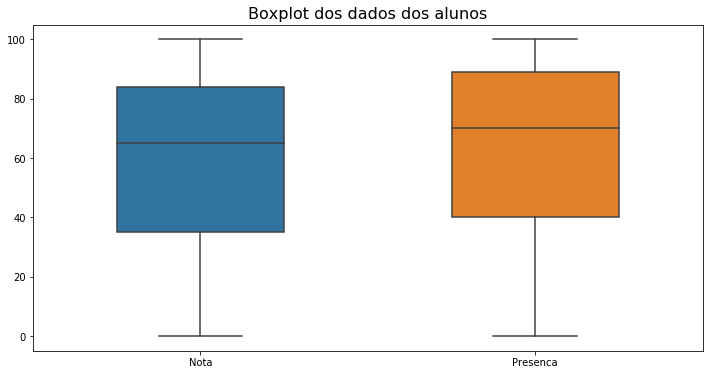

In [8]:
ax = sb.boxplot(data = dataset, width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot dos dados dos alunos', fontsize = 16)
ax

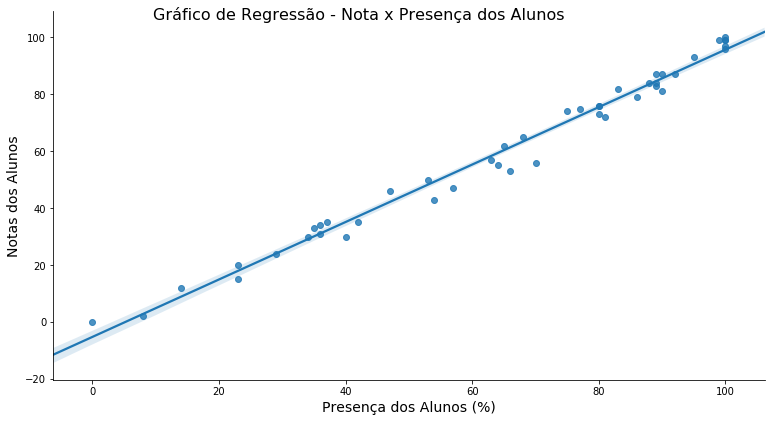

In [9]:
ax = sb.lmplot(x='Presenca', y = 'Nota', data = dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - Nota x Presença dos Alunos', fontsize = 16)
ax.set_xlabels('Presença dos Alunos (%)', fontsize = 14)
ax.set_ylabels('Notas dos Alunos', fontsize = 14)
ax

In [10]:
dataset.corr()

,Nota,Presenca
Nota,1.0000,0.9926
Presenca,0.9926,1.0000


https://www.statsmodels.org/stable/regression.html

In [11]:
Y = dataset.Nota
X = sm.add_constant(dataset.Presenca)

C:\Users\ebezerra\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
Y.head()

0    20
1    34
2    30
3    15
4    35
Name: Nota, dtype: int64

In [13]:
X.head()

,const,Presenca
0,1.0,23
1,1.0,36
2,1.0,34
3,1.0,23
4,1.0,42


**Vamos estimar logo um modelo de regressão linear!**

In [16]:
resultado_regressao = sm.OLS(Y, X).fit()

In [15]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                   Nota   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2873.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           5.15e-41
Time:                        08:45:49   Log-Likelihood:                -119.80
No. Observations:                  45   AIC:                             243.6
Df Residuals:                      43   BIC:                             247.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2894      1.335     -3.963      0.0

**E vamos ver na prática como nosso modelo prevê valores, utilizando a própria amostra**

In [61]:
dataset['Nota_Prevista'] = resultado_regressao.predict()
dataset

,Nota,Presenca,Nota_Prevista,Residuos
0,20,23,17.938683,2.061317
1,34,36,31.067579,2.932421
2,30,34,29.047749,0.952251
3,15,23,17.938683,-2.938683
4,35,42,37.127069,-2.127069
5,81,90,85.602991,-4.602991
6,47,57,52.275795,-5.275795
7,87,90,85.602991,1.397009
8,99,100,95.702141,3.297859
9,43,54,49.246049,-6.246049


### 1.1. Relembrando alguns conceitos importantes

**Relembrando covariância**

**Com a covariância, podemos verificar o tipo de relação entre variáveis**

*   **Se o valor da covariância for positivo:** associação linear positiva entre X e Y (i.e., quando o valor de X aumentar, o valor de Y também irá aumentar; analogamente, quando o valor de X diminuir, o valor de Y também irá diminuir);
*   **Se o valor da covariância for negativo:** associação linear negativa entre X e Y (i.e., quando o valor de X aumentar, o valor de Y tende a diminuir; quando o valor de X diminuir, o de Y tende a aumentar).



![alt text](https://acadgild.com/blog/wp-content/uploads/2018/09/Covariance-and-Correlation.jpg)

In [17]:
dataset[['Nota', 'Presenca']].cov()

,Nota,Presenca
Nota,833.563636,813.209091
Presenca,813.209091,805.225253


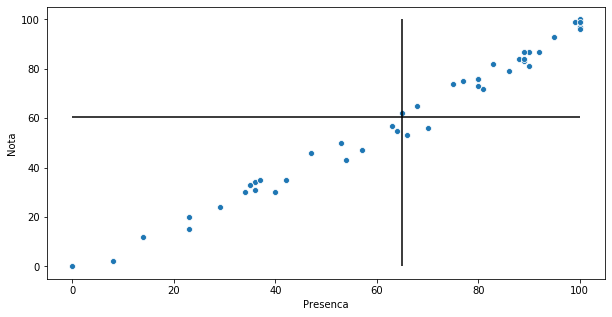

In [18]:
x = dataset.Presenca
y = dataset.Nota

ax = sb.scatterplot(x, y)
ax.figure.set_size_inches(10,5)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max())
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max())
ax

In [22]:
amostra = dados.query('Renda < 5000').sample(n = 20, random_state = 101) #dividir em 20 subamostras

In [23]:
amostra.cov()

,Sexo,Idade,Renda,Altura
Sexo,0.221053,-1.126316,48.747368,0.001871
Idade,-1.126316,134.410526,-4947.968421,0.016506
Renda,48.747368,-4947.968421,764668.326316,-7.138236
Altura,0.001871,0.016506,-7.138236,0.003354


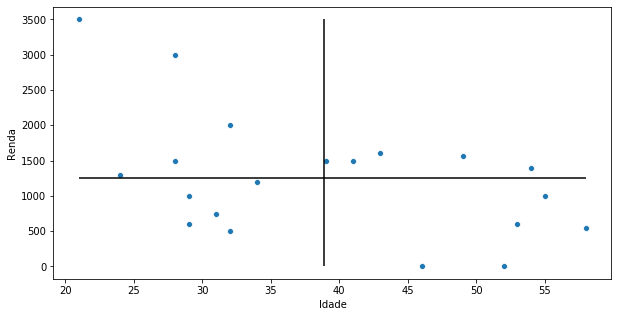

In [24]:
x = amostra.Idade
y = amostra.Renda

ax = sb.scatterplot(x, y)
ax.figure.set_size_inches(10,5)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max())
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max())

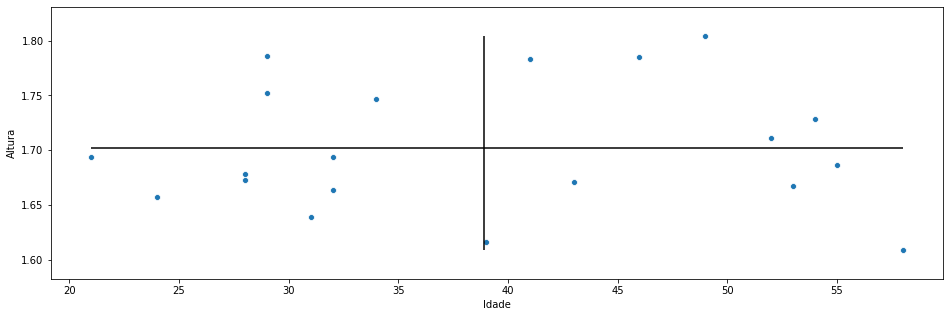

In [25]:
x = amostra.Idade
y = amostra.Altura

ax = sb.scatterplot(x, y)
ax.figure.set_size_inches(16,5)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max())
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max())

Analisar a covariância pode ser problemático, pois ela depende da unidade de medida das variáveis estudadas.

### 1.2. Coeficiente de correlação de Pearson

Mede o grau da correlação (e a direção dessa correlação - se positiva ou negativa) entre duas variáveis.

*   Normalmente representado por $\rho$;
*   Pode assumir apenas valores entre -1 e 1.
*   Quando $\rho = 1$: há uma correlação perfeita positiva entre as duas variáveis;
*   Quando $\rho = -1$: há uma correlação negativa perfeita entre as duas variáveis;
*   Quando $\rho =0$: as duas variáveis não dependem linearmente uma da outra. No entanto, pode existir uma dependência não linear. Assim, dado este resultado, deve-se aprofundar a investigação.

*Observação importante!!!*

Não confundir associação entre variáveis com causalidade! Uma correlação forte entre duas variáveis pode não significar que variações em uma delas provocará variações na outra!

In [31]:
dataset.corr().round(2)

,Nota,Presenca
Nota,1.00,0.99
Presenca,0.99,1.00


In [30]:
matriz_correlacao = dados.corr().round(2)

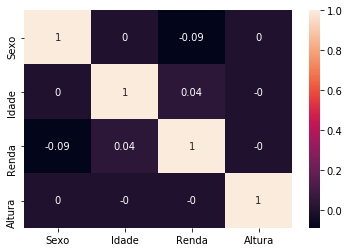

In [35]:
sb.heatmap(data = matriz_correlacao, annot = True)

## 2. Conhecendo e Interpretando a Equação de Regressão

**Regressão linear modela o relacionamento entre a magnitude de uma variável (variável dependente) e uma segunda variável (variável independente).**

*Ponto interessante:*

Enquanto a correlação mede a força da associação entre variáveis, a regressão linear quantifica a natureza deste relacionamento.

> Y = Variável Dependente ou Prevista

> X = Variável Independente ou Característica


EQUAÇÃO DE REGRESSÃO

$Y_i = \beta_0 + \beta_1X_i$,

em que: 

* $Y_i$ é a variável dependente, que pretendemos prever;
* $X_i$ é variável independente
* $\beta_0$ é  intercepto (interceptor da linha de regressão, i.e., valor previsto quando $X_i = 0$);
* $\beta_1$ é o coefiente angular (o declive da linha de regressão).

No final das contas, estamos tentando prever a variável Y a partir de X usando um relacionamento linear (i.e., uma linha).

## 3. Regressão Linear Simples

Em uma análise de regressão linear simples, estimamos uma função de regressão de forma a estimar os valores dos parâmetros $\beta_0$ e $\beta_1$ com base nas observações de $Y$ e $X$.

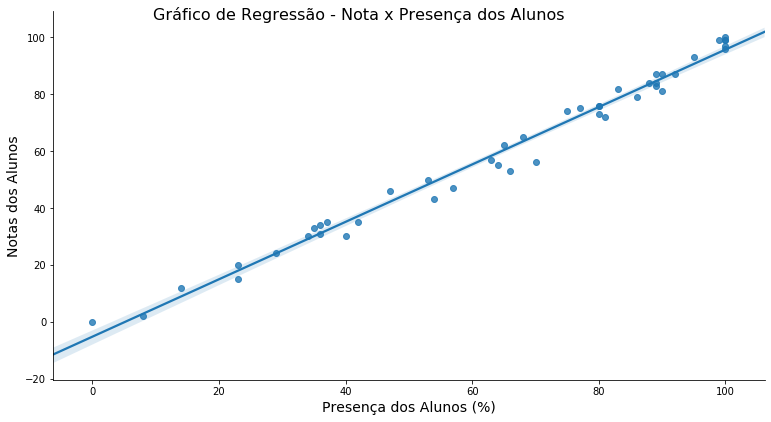

In [36]:
ax = sb.lmplot(x='Presenca', y = 'Nota', data = dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - Nota x Presença dos Alunos', fontsize = 16)
ax.set_xlabels('Presença dos Alunos (%)', fontsize = 14)
ax.set_ylabels('Notas dos Alunos', fontsize = 14)
ax

In [37]:
dataset.corr()

,Nota,Presenca
Nota,1.0000,0.9926
Presenca,0.9926,1.0000


![alt text](https://slideplayer.com.br/slide/49939/1/images/9/Modelo+de+Regress%C3%A3o+Linear+mais+simples+%21%21.jpg)

**Precisamos entender alguns conceitos para compreender melhor a equação de regressão.**

*   O erro ou resíduo é obtido quando utilizamos o modelo linear estimado (i.e., a reta) pra estimar um valor, pois, em geral, os dados quase nunca ficam exatamente em cima da reta. Por isso, devemos adicionar o erro (resíduo) à equação de regressão;


*   Os valores ajustados, também chamados de valores previstos, são geralmente denotados por Y-chapéu.

**Esquação de Regressão com Valores Ajustados**

$Y_i = \hat{\beta}_1 + \hat{\beta}_2X_i + \hat{u}_i$

Cálculo dos resíduos:

$\hat{u}_i = Y_i - \hat{Y}_i$,

em que $\hat{Y}_i$ é o valor estimado de $Y_i$.

### 2.1. Método de Mínimos Quadrados (ou Mínimos Quadrados Ordinários)

*Falamos em ajustes... então, como ajustamos o modelo aos dados?*

Como não podemos obter a função de regressão da população (FRP) de forma direta, usamos a função de regressão amostral (FRA), descrita anteriormente.

Na prática, a linha de regressão é a estimativa que minimiza a soma dos valores quadrados dos resíduos (RSS).

Esperamos que a soma dos erros (resíduos) seja ser a menor possível, sim?

O critério de minimização da soma dos resíduos assume que todos os resíduos tem o mesmo peso no somatório, o que nem sempre se comprova. É possível que existam resíduos bem mais afastados da linha gerada pela equação de regressão. Isso pode acarretar em uma soma dos resíduos bem pequena, podendo até ser nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar este problema, podemos utilizar o **Método de Mínimos Quadrados**. Nele, elevamos ao quadrado os resíduos, o que retira o problema de valores de resíduos negativos.


In [38]:
Y = dataset.Nota
X = sm.add_constant(dataset.Presenca)

C:\Users\ebezerra\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Modelo estimado**

In [41]:
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [45]:
resultado_regressao.params

const      -5.289363
Presenca    1.009915
dtype: float64

In [46]:
beta_0 = resultado_regressao.params[0]
beta_0

-5.289362534857544

In [44]:
beta_1 = resultado_regressao.params[1]
beta_1

1.009915037262927

Os valores dos betas precisam estar dentro do intervalo de confiança definido para nossa variável de interesse.

In [47]:
resultado_regressao.conf_int(alpha = 0.05)

,0,1
const,-7.981022,-2.597703
Presenca,0.971918,1.047912


Previsões utilizando a própria amostra

In [48]:
dataset['Nota_Prevista'] = beta_0 + beta_1 * dataset.Presenca
dataset.head(15)

,Nota,Presenca,Nota_Prevista
0,20,23,17.938683
1,34,36,31.067579
2,30,34,29.047749
3,15,23,17.938683
4,35,42,37.127069
5,81,90,85.602991
6,47,57,52.275795
7,87,90,85.602991
8,99,100,95.702141
9,43,54,49.246049


Com o statmodels

In [49]:
dataset['Nota_Prevista_StatsModels'] = resultado_regressao.predict()
dataset.head(15)

,Nota,Presenca,Nota_Prevista,Nota_Prevista_StatsModels
0,20,23,17.938683,17.938683
1,34,36,31.067579,31.067579
2,30,34,29.047749,29.047749
3,15,23,17.938683,17.938683
4,35,42,37.127069,37.127069
5,81,90,85.602991,85.602991
6,47,57,52.275795,52.275795
7,87,90,85.602991,85.602991
8,99,100,95.702141,95.702141
9,43,54,49.246049,49.246049


E agora fora da amostra

In [50]:
dataset.drop('Nota_Prevista_StatsModels', axis = 1, inplace = True)
dataset.head(15)

,Nota,Presenca,Nota_Prevista
0,20,23,17.938683
1,34,36,31.067579
2,30,34,29.047749
3,15,23,17.938683
4,35,42,37.127069
5,81,90,85.602991
6,47,57,52.275795
7,87,90,85.602991
8,99,100,95.702141
9,43,54,49.246049


In [51]:
resultado_regressao.predict([1, 75])

array([70.45426526])

**Verificando os resíduos**

In [52]:
dataset['Residuos'] = resultado_regressao.resid
dataset.head(15)

,Nota,Presenca,Nota_Prevista,Residuos
0,20,23,17.938683,2.061317
1,34,36,31.067579,2.932421
2,30,34,29.047749,0.952251
3,15,23,17.938683,-2.938683
4,35,42,37.127069,-2.127069
5,81,90,85.602991,-4.602991
6,47,57,52.275795,-5.275795
7,87,90,85.602991,1.397009
8,99,100,95.702141,3.297859
9,43,54,49.246049,-6.246049


Suposições dos resíduos:

1. o resíduo é uma variável aleatória com média igual a zero (ou muito próxima)

In [53]:
dataset.Residuos.mean()

4.2829937127761594e-14

2. Os valores dos resíduos são independentes

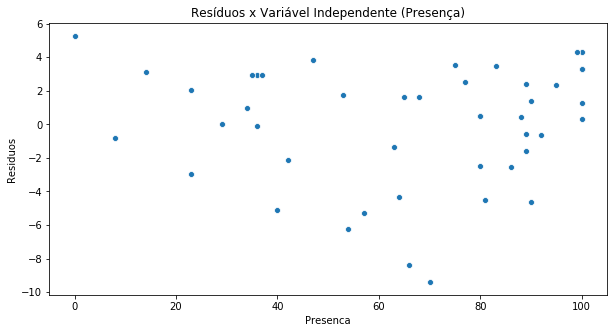

In [54]:
ax = sb.scatterplot(x = dataset.Presenca, y=dataset.Residuos)
ax.figure.set_size_inches(10,5)
ax.set_title('Resíduos x Variável Independente (Presença)')
ax

3. A variância dos resíduos é a mesma para todos os valores de X
4. O resíduo é uma variável aleatória normalmente distribuída

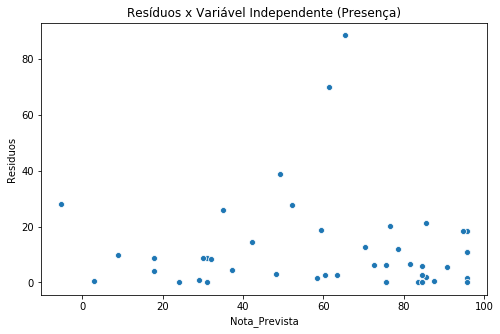

In [55]:
ax = sb.scatterplot(x = dataset.Nota_Prevista, y=dataset.Residuos**2)
ax.figure.set_size_inches(8,5)
ax.set_title('Resíduos x Variável Independente (Presença)')
ax

![alt text](https://image.slidesharecdn.com/06-tpico5-heterocedasticidade-130213191813-phpapp01/95/06-tpico-5-heterocedasticidade-32-1024.jpg?cb=1421611027)

**Lembrete Importante!**

Homocedasticidade: termo usado para designar variância constante dos erros experimentais para observações distintas.

Na figura, (a) sugere que há homocedasticidade dos dados; enquanto os demais sugerem que a variância dos erros não é constante.

### 2.2. Coeficiente de Determinação ($R^2$)

Valor que varia entre 0 e 1 e nos diz o quanto a equação de regressão amostral representa os dados. Isto é, informa quão bem o modelo gerado acomoda os dados.

**SQE:** Soma dos Quadrados dos Erros - representa o erro observado quando usamos o $\hat{Y}$ para estimar o $Y$

$SQE = \sum{(Y_i - \hat{Y}_i)^2}$

In [56]:
sqe = resultado_regressao.ssr
sqe

540.8280686877254

**SQT:** Soma dos Quadrados Total - representa o erro quando utilizamos a média do $\hat{Y}$ para estimar o $Y$

$SQT = \sum{(Y_i - \bar{Y})^2}$

In [57]:
SQT = (dataset.Nota.apply(lambda y : dataset.Nota.mean())**2).sum()
SQT

164167.2

**SQR:** Soma dos Quadrados da Regressão - representa o quanto o valor estimado $\hat{Y}$ se afasta da média.

$SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$

![alt text](https://slideplayer.com.br/slide/3753095/12/images/22/Somas+de+quadrados+%3D+%2B+SQT+varia%C3%A7%C3%A3o+total+SQR+varia%C3%A7%C3%A3o+explicada.jpg)

In [58]:
sqr = resultado_regressao.ess
sqr

36135.97193131228

No final,

$R^2 = SQR/SQT$

In [59]:
resultado_regressao.rsquared

0.9852542187789631

In [60]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                   Nota   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2873.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           5.15e-41
Time:                        10:55:29   Log-Likelihood:                -119.80
No. Observations:                  45   AIC:                             243.6
Df Residuals:                      43   BIC:                             247.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2894      1.335     -3.963      0.0

Quanto mais próximo de 1 for o valor do $R^2$, mais ajustado está o modelo aos dados.

E quanto mais perto do 0, mais imperfeito ele será (i.e., quanto mais o SQR se aproxima mais do valor 0).

**Observação importante:**

Apesar de indicar fortes indícios, somente analisando o $R^2$ não é possível tirar conclusões definitivas de que $Y$ é ou não estatisticamente significante. É preciso uma análise mais profunda para se certificar disso, utilizando testes de hipóteses e análise de outros parâmetros.

Porém, em muitos casos, os cientistas de dados não se envolvem com a interpretação dessas estatísticas, nem com a questão de significância estatística.

## 4. REGRESSÃO LINEAR MÚLTIPLA

EQUAÇÃO DE REGRESSÃO MÚLTIPLA

$Y_i = \beta_0 + \beta_1X_1$ + $\beta_2X_2$ + ... + $\beta_iX_i$,

Ou seja, quando existem múltiplas preditoras, a equação simplesmente se estende para comodá-las.

Em vez de uma linha, agora temos um modelo linear (o relacionamento entre cada coeficiente e sua variável é linear).



> Todos os outros conceitos em regressão linear simples, como ajustes por mínimos quadrados e a definição de valores ajustados e resíduos, se estendem à configuração da regressão linear múltipla.



In [0]:
from sklearn import linear_model

https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

In [62]:
dados_regressao_multipla = pd.read_csv('kc_house_data.csv')

In [63]:
dados_regressao_multipla.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [64]:
dados_regressao_multipla.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


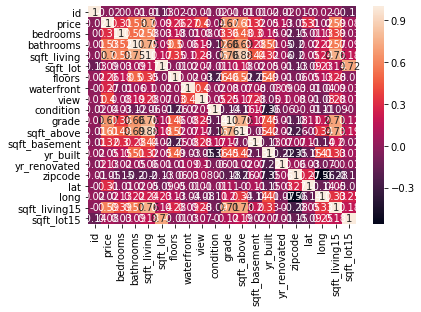

In [66]:
matriz_correlacao = dados_regressao_multipla.corr().round(2)
sb.heatmap(data = matriz_correlacao,annot=True)

In [67]:
X_preditores = dados_regressao_multipla[['bathrooms', 'bedrooms', 'sqft_living',
                                         'grade', 'sqft_lot']]

In [68]:
X_preditores = sm.add_constant(X_preditores)

In [69]:
Y_target = dados_regressao_multipla.price

In [70]:
model = sm.OLS(Y_target, X_preditores).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5169.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:19:46   Log-Likelihood:            -2.9910e+05
No. Observations:               21613   AIC:                         5.982e+05
Df Residuals:                   21607   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.716e+05   1.49e+04    -31.652      

## 5. VARIÁVEIS FATORIAIS EM REGRESSÃO

Essas variáveis, também chamadas de variáveis categóricas, assumem um número limitado de valores discretos.

Para utilizar variáveis fatoriais, geralmente a convertemos em um conjunto de variáveis binárias fictícias.

## 6. INVESTIGANDO OUTLIERS E VALORES INFLUENTES

**Outlier:** valor distante da maioria das outras observações.

Na regressão, especificamente, um outlier é um registro cujo valor Y real é distante dos valores previstos.

*E como identificamos outliers?*

Gráficos, estudo individual de valores da amostra ou, no caso de regressão, a partir da análise dos resíduos padronizados (resíduos divididos pelo erro-padrão dos resíduos). Essa é a métrica que costuma ser usada para determinar se um registro é classificado como um outlier.



**Valores Influentes:** valor cuja ausência poderia alterar significantemente a equação de regressão.

Em regressões envolvendo muitos registros, é incomum que qualquer observação traga peso suficiente para causar uma influência extrema na equação ajustada (apesar dela poder conter alguns grandes outliers).